**Mateo Alexander**

In [ ]:
**PLAN 6113: Exploring Urban Data with Machine Learning**

In [ ]:
**Jonathan Stiles**

In [ ]:
"""
Complete the "ML_PS2_Blank" iPython file with the required code and/or text. When finished renname and submit that file here.
"""

In [57]:
# add essential import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Opening and assessing a CSV data set

In [58]:
# Read in the "lab2_data1.csv" dataset as a CSV and preview it
# This is a Census PUMS (public use microdata sample) of households in the five boroughs of NYC
# In PUMS data, small geography variables (e.g tracts) are not available to protect privacy
nychouseholds = pd.read_csv('lab2_data1.csv')
# in addition to previewing the shape, and values with head, we can also preview column datatypes
print(nychouseholds.shape)
print(nychouseholds.head(10))
print(nychouseholds.dtypes)

(62879, 10)
   Unnamed: 0  YEAR  STATEFIP  COUNTYFIP  OWNERSHP  HHINCTHOU  FOODSTMP  \
0        3865  2022        36         81       1.0      116.8         1   
1        3866  2022        36         81       1.0      116.8         1   
2        3867  2022        36         81       1.0      116.8         1   
3        3868  2022        36         81       1.0      116.8         1   
4        3869  2022        36         81       2.0       32.1         1   
5        3870  2022        36         81       2.0       67.0         1   
6        3871  2022        36         81       2.0       67.0         1   
7        3872  2022        36         81       1.0       58.4         1   
8        3873  2022        36         81       1.0       58.4         1   
9        3874  2022        36         81       1.0       58.4         1   

   BEDROOMS  VEHICLES  MULTGEN  
0       3.0       3.0      2.0  
1       3.0       3.0      2.0  
2       3.0       3.0      2.0  
3       3.0       3.0      2.0

In [59]:
# NaN refers to missing data for a particular observation/variable
# Previewing sample observations shows a better view of a dataset than head
# especially to see if NaNs are prominent or rare
print(nychouseholds.sample(20))

       Unnamed: 0  YEAR  STATEFIP  COUNTYFIP  OWNERSHP  HHINCTHOU  FOODSTMP  \
31742       35683  2022        36         47       2.0       35.0         1   
9771        13669  2022        36         61       2.0        4.0         1   
35920       39865  2022        36         47       2.0       70.0         1   
12207       16111  2022        36         61       2.0       63.0         1   
48973       52930  2022        36         47       2.0      110.6         1   
11695       15593  2022        36          5       1.0      289.0         1   
40578       44527  2022        36          5       1.0      185.0         1   
2273         6140  2022        36         81       2.0      169.0         1   
55644       59616  2022        36         81       1.0      175.0         1   
28417       32355  2022        36         47       1.0      136.5         1   
53758       57721  2022        36          5       2.0       53.6         2   
1824         5689  2022        36         47       2

### Defining a new variable based on the values of another variable

In [60]:
# Let's make a new categorical string variable for borough based on COUNTYFIP
nychouseholds['BOROUGH'] = '' #make the default an empty string
nychouseholds.loc[nychouseholds.COUNTYFIP == 5, 'BOROUGH'] = 'Bronx'
nychouseholds.loc[nychouseholds.COUNTYFIP == 47, 'BOROUGH'] = 'Brooklyn'
nychouseholds.loc[nychouseholds.COUNTYFIP == 61, 'BOROUGH'] = 'Manhattan'
nychouseholds.loc[nychouseholds.COUNTYFIP == 81, 'BOROUGH'] = 'Queens'
nychouseholds.loc[nychouseholds.COUNTYFIP == 85, 'BOROUGH'] = 'Staten Island'

### Frequencies of a categorical variable using value_counts()

BOROUGH
Brooklyn         21236
Queens           20377
Manhattan         8757
Bronx             8274
Staten Island     4235
Name: count, dtype: int64

FOODSTMP
1    48972
2    13907
Name: count, dtype: int64

<Axes: xlabel='BOROUGH'>

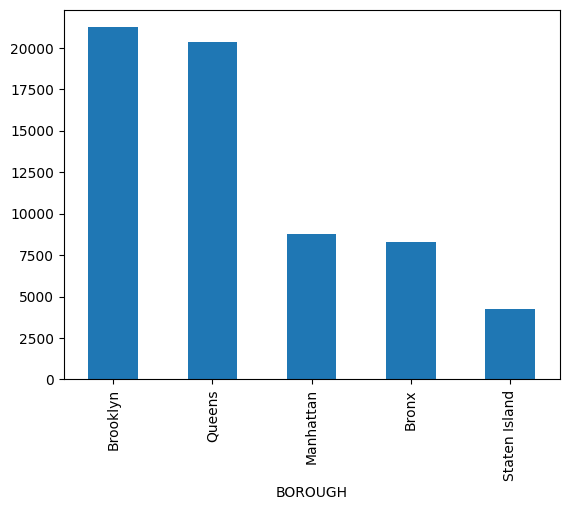

In [61]:
# BOROUGH frequencies
display(nychouseholds['BOROUGH'].value_counts())
# FOODSTMP is a  binary variable with 1 indicating that a HH does not recieve food stamps
# and 2 indicating that a  HH does recieve food stamps
display(nychouseholds['FOODSTMP'].value_counts())
# we can also easily visualize our value counts with plot.bar()
display(nychouseholds['BOROUGH'].value_counts().sort_values(ascending=False).plot.bar()) 

###  Crosstab of two categorical variables using crosstab()

BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
FOODSTMP,,,,,,
1,5183,16155,7360,16706,3568,48972
2,3091,5081,1397,3671,667,13907
Total,8274,21236,8757,20377,4235,62879


BOROUGH,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Total
FOODSTMP,,,,,,
1,0.62642,0.760736,0.84047,0.819846,0.842503,0.778829
2,0.37358,0.239264,0.15953,0.180154,0.157497,0.221171


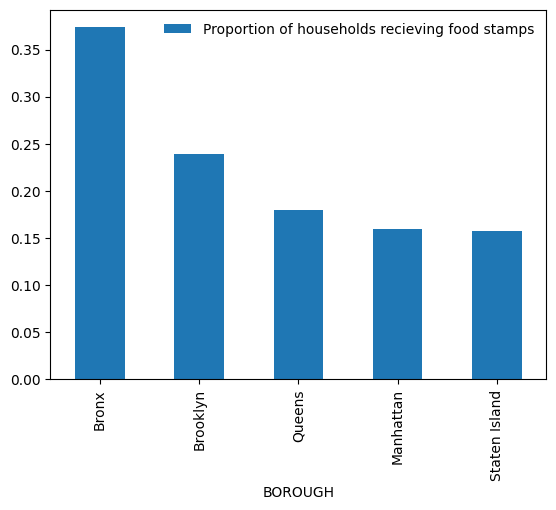

In [62]:
# Are there different rates of food stamp usage by borough?
# For two categorical variables like this, a crosstab can show us
display(pd.crosstab(nychouseholds.FOODSTMP, nychouseholds.BOROUGH, margins=True, margins_name="Total"))
# To more easily compare boroughs we can normalize the crosstab counts to be proportions (which can be read as percentages)
display(pd.crosstab(nychouseholds.FOODSTMP, nychouseholds.BOROUGH, margins=True, margins_name="Total", normalize="columns"))
# we can also plot part of this crosstab with plot.bar()
pd.crosstab(nychouseholds.FOODSTMP, nychouseholds.BOROUGH, margins=False, normalize="columns").iloc[1,:].sort_values(ascending=False).plot.bar(label='Proportion of households recieving food stamps')
plt.legend(loc='best', frameon=False)

### Calculating univariate descriptives for a numeric variable

In [63]:
# Let's compute and print a standard set of univariate statistics
min = nychouseholds.BEDROOMS.min()
max = nychouseholds.BEDROOMS.max()
mean = nychouseholds.BEDROOMS.mean()
stddev = nychouseholds.BEDROOMS.std()
median = nychouseholds.BEDROOMS.median()
print('--Bedroom Descriptive Stats--')
print('range:', min, '-', max)
print('mean:', mean)
print('median:', median)
print('sd:', stddev)
# Based on these statistics, as well as logically, this can be considered a discrete numeric variable

--Bedroom Descriptive Stats--
range: 0.0 - 6.0
mean: 2.396173603269772
median: 2.0
sd: 1.2137155221194345


### Histogram of a numeric variable

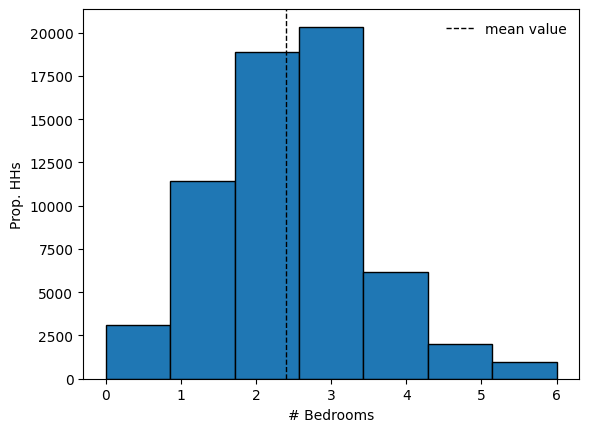

In [64]:
# basic histogram
# because this is discrete we can set the number of bins equal to its range
plt.hist(nychouseholds.BEDROOMS, edgecolor='k', bins=7, density=False)
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1, label='mean value')
plt.xlabel("# Bedrooms")
plt.ylabel("Prop. HHs")

# add a normal curve for comparison (requires the above to be density=True)
#import scipy as sp
#x = np.linspace(sp.stats.norm(mean,stddev).ppf(0.01),sp.stats.norm(mean,stddev).ppf(0.99), 100)
#pdf = sp.stats.norm(mean,stddev).pdf(x)
#plt.plot(x, pdf,'r-', lw=5, alpha=0.6, label='PDF')

plt.legend(loc='best', frameon=False)


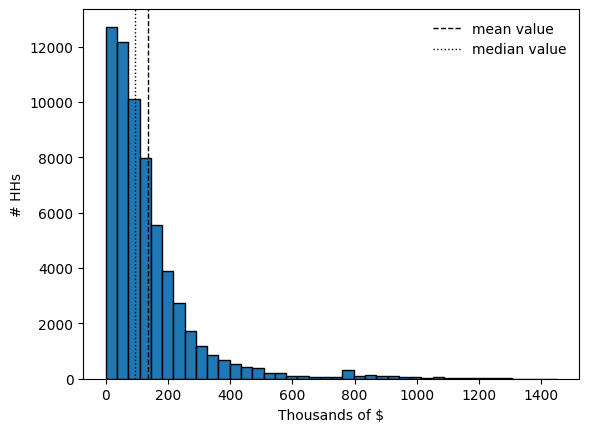

In [65]:
# Histogram for the income variable
plt.hist(nychouseholds.HHINCTHOU, edgecolor='k', bins=40, density=False)
plt.axvline(nychouseholds.HHINCTHOU.mean(), color='k', linestyle='dashed', linewidth=1, label='mean value')
plt.axvline(nychouseholds.HHINCTHOU.median(), color='k', linestyle='dotted', linewidth=1, label='median value')
plt.xlabel("Thousands of $")
plt.ylabel("# HHs")
plt.legend(loc='best', frameon=False)
# This variable appears to be a continuous numeric variable

### Scatterplot and boxplot for two numeric variables

<Axes: title={'center': 'HHINCTHOU'}, xlabel='BEDROOMS'>

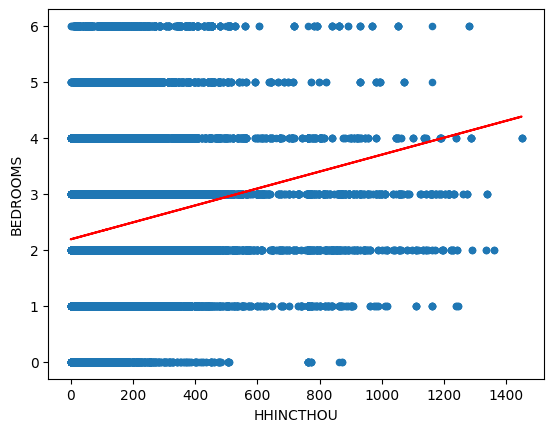

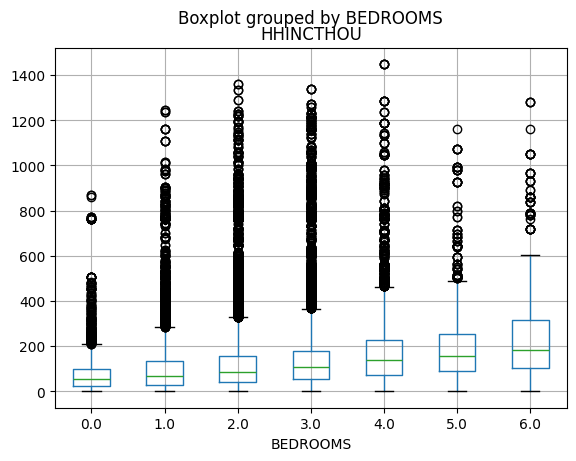

In [66]:
# simple scatterplot of income and bedrooms
nychouseholds.plot.scatter(x='HHINCTHOU',y='BEDROOMS')
# add a trendline
p = np.poly1d(np.polyfit(nychouseholds.HHINCTHOU, nychouseholds.BEDROOMS, 1))
plt.plot(nychouseholds.HHINCTHOU, p(nychouseholds.HHINCTHOU),c='r')

# a boxplot works well for discrete-continuous pair
# it shows quartiles and outliers
nychouseholds.boxplot(column=['HHINCTHOU'],by='BEDROOMS')